In [20]:
# INICIALIZACIÓN DE LIBRERIAS   
import numpy as np #Libreria para operaciones de matrices
import scipy as cs
import matplotlib.pyplot as plt
import math as mat

from sklearn.datasets import make_circles



<function math.exp>

In [41]:
#PROGRAMA QUE CALCULA EL VALOR ÉPSILON DEL COMPILADOR

Cont = 1 #Variable que almacena el numero de
          #veces que se iterará el ciclo while#

E=0.5

while 1+E>1:     #Mientras 1 más el valor de épsilon sea 
                  #mayor a 1 se ejecutará el ciclo while.
              

  E = E/2        #Cada vez que se ejecute el ciclo while
                  #el valor de épsilon será la mitad del valor épsilon anterior. 

  Cont = Cont + 1 #Se incremenata el contador en 1
Suma = E + 1 

print("Contador = ",Cont) #Se imprime el valor del contador.
print("1 + E = ",Suma)

Contador =  53
1 + E =  1.0


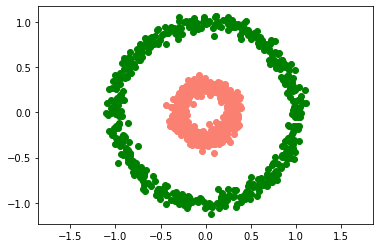

In [ ]:
# CREAR EL DATASET, PARAMETROS DE ENTRADA

n = 1000                                                                               #numero de muestras o registros de nuestros datos 
p = 2                                                                                  #numero de categorias o caracteristicas de nuestros datos

DatosIN2, DatosOut2 = make_circles(n_samples=n, factor=0.3, noise=0.05)                #Datos de entrada y salida que obtenemos de la funcion MakeCirlces
DatosOut2 = DatosOut2[:, np.newaxis]                                                   #Covertimos el vector de los datos de salida en matriz columna

#Visualisar los datos en una grafica
plt.scatter(DatosIN2[DatosOut2[:, 0] == 0, 0], DatosIN2[DatosOut2[:, 0] == 0, 1], c="green")
plt.scatter(DatosIN2[DatosOut2[:, 0] == 1, 0], DatosIN2[DatosOut2[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [ ]:
MAT = np.zeros((200,2))
Vp = np.linspace(0, 100, 200)
Sp = np.linspace(10, 80, 200)
OUT = np.linspace(20,40, 200)

OUT=OUT[:,np.newaxis]

for i in range(0,200):
 MAT[i,0] = Vp[i]
 MAT[i,1] = Sp[i]  

In [ ]:
#CREACIÓN DE LA CLASE TIPO CAPA NEURONAL
class Capa_Neuronal():
 
  def __init__(self, Num_conexiones, Num_neuronas, FuncionDeActivacion):#FuncDe_activacion):           #Definición de los atributos que tiene la clase 
                                                               
    self.FuncionDeActivacion = FuncionDeActivacion#FuncDe_activacion                                 #Inialización de los atributos de la clase
    self.bias = np.random.rand(1, Num_neuronas)                       * 2 - 1    #
    self.Pesos = np.random.rand(Num_conexiones, Num_neuronas)         * 2 - 1    

In [ ]:
#FUNCIONES DE ACTIVACIÓN
sigm = (lambda x: 1 / (1 + np.e ** (-x)), lambda x: x * (1 - x))  

#relu = lambda x: np.maximum(0, x)

#_x = np.linspace(-5, 5, 100)
#plt.plot(_x, relu(_x))

In [ ]:
#FUNCIÓN PARA CREAR LA RED
def RedNeuronal(TopologiaDeRed, Funcion_De_Activacion):               #Función que recibe como entrada el vector de la topologia de la red y la funcion de activacion
  
  Red = []                                                          #Vector donde se almacenan las capas neuronales que va a contener la red 
  
  for l, layer in enumerate(TopologiaDeRed[:-1]):                   #Bucle llenar el vector Red con la clase Capa_neuronal y pasandole los atributos de la clase
    
    Red.append(Capa_Neuronal(TopologiaDeRed[l], TopologiaDeRed[l+1], Funcion_De_Activacion))
    
  return Red

In [ ]:
#Función de coste
FuncionDeCoste = (lambda YPredecida, YReal: np.mean((YPredecida - YReal) ** 2),lambda YPredecida, YReal: (YPredecida - YReal))

In [ ]:
# FUNCION PARA EL ENTRENAMIENTO

#CREAMOS LA FUNCIÓN PARA ENTRENAR LA RED
def Entrenamiento(Red, DATOS_in, DATOS_out, FUNCIONdeCOSTE, Learning_Rate, Entrenamiento_SW):  
  
  out = [(None, DATOS_in)]                               #Vector para guardar resultado de las sumas ponderadas y de las funciones de activación
  
  #METODO FORWARD PASS
  for I, kpa in enumerate(Red):                         #Bucle para recorrer las capas de la red     
    z = out[-1][1] @ Red[I].Pesos + Red[I].bias         #Suma ponderada (en el primer ciclo no referimos a la primer capa) 
    a = Red[I].FuncionDeActivacion[0](z)                #Resultado de la suma ponderada que pasa por la funcion de activacion
    
    out.append((z, a))                                  #Llenado del vector con los valores obtenidos

  #print(FuncionDeCoste[0](out[-1][1],DatosOut))        #Error de salida sin entrenar la red
  ValPred = out[-1][1]
  if Entrenamiento_SW:                                  #Condicionante para entrenar con backpropagation
    
    # Backward pass 
    deltas = []

    for i in reversed(range(0, len(Red))):
      
      z = out[i+1][0]               
      a = out[i+1][1]

    #backpropagation         
      if i == len(Red) - 1:                                           #Para saber si estamos en la ultima capa (valor de l = al tamaño de miRed menos 1
        deltas.insert(0, FUNCIONdeCOSTE[1](a, DATOS_out) * Red[i].FuncionDeActivacion[1](a))                     #Calcula Gradiente de la ultima capa
      else:
        deltas.insert(0, deltas[0] @ _Pesos.T * Red[i].FuncionDeActivacion[1](a))                               #Calcula Gradianete de la capa anterior
       
      _Pesos = Red[i].Pesos
 
      # Gradient descent
      Red[i].bias  = Red[i].bias  - np.mean(deltas[0], axis=0, keepdims=True) * Learning_Rate   
      Red[i].Pesos = Red[i].Pesos - out[i][1].T @ deltas[0] * Learning_Rate

  return ValPred
 

In [ ]:
miTopologia = [2,8,1]                          #Vector que contiene el numero de neuronas que decemos en la red y capas de la red
miRed = RedNeuronal(miTopologia, sigm)              #Creación de la red



In [ ]:
# ENTRENAMIENTO

#for j in range(25000):   
pY = Entrenamiento(miRed, MAT,  None ,FuncionDeCoste, 0.05, Entrenamiento_SW = False)




In [ ]:
print(pY)